# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefe

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read .npy file in numpy array
plant_images = np.load('/content/drive/MyDrive/Python/images.npy')

In [5]:
# Read .cvs file in dataframe
plant_labels = pd.read_csv('/content/drive/MyDrive/Python/Labels.csv')

## Data Overview

### Understand the shape of the dataset

####Let's print the shape of the images array

In [6]:
print(plant_images.shape)

(4750, 128, 128, 3)


There are 4750 images of shape 128 x 128 X 3, each image having 3 channels.

####Let's print the shape of the labels

In [7]:
print(plant_labels.shape)

(4750, 1)


## Exploratory Data Analysis

### Checking the distribution of the target variable

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [8]:
def plot_images(plant_images, plant_labels):
    num_classes = 12                                                                  # Number of Classes
    categories = np.unique(plant_labels)                                              # Obtain unique classes from labels
    rows, cols = 3, 4                                                                 # Defining rows and columns for a 3x4 grid
    fig = plt.figure(figsize=(10, 8))                                                 # Figure size

    # Loop over each class to display one example of each
    for i, category in enumerate(categories[:rows * cols]):                           # Limit to rows * cols classes
        class_indices = np.where(plant_labels == category)[0]                         # Get indices for current category
        random_index = np.random.choice(class_indices)                                # Choose random index from the class

        ax = fig.add_subplot(rows, cols, i + 1)                                       # Adding subplots
        ax.imshow(plant_images[random_index])                                         # Plotting the image
        ax.set_title(category)                                                        # Setting title to category label
        ax.axis('off')                                                                # Hide axis for clarity

    plt.tight_layout()
    plt.show()

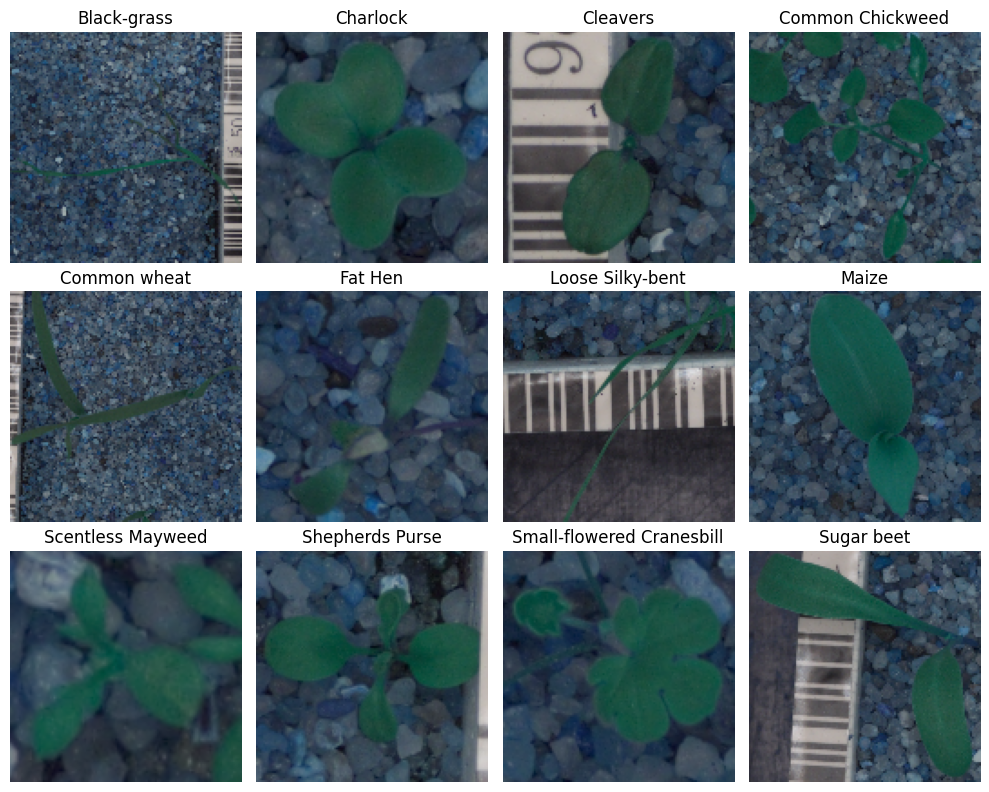

In [9]:
plot_images(plant_images,plant_labels)

- **Observations**
 - As per above images plot dataset has 12 different types of plants

### **Let's look at count distribution of plant classes**

In [10]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Total number of Plant labels = 12 with distinct plant lables ['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


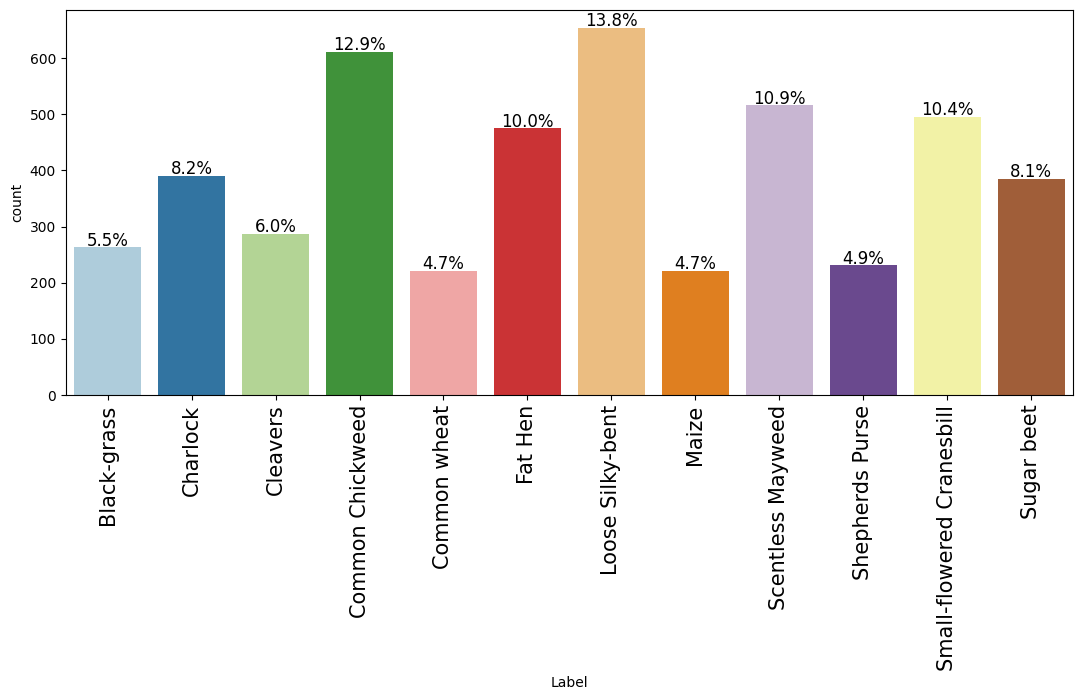

In [11]:
# Check all unique Geographical locations exists in Geographical column
print(f"Total number of Plant labels = {plant_labels['Label'].nunique()} with distinct plant lables {plant_labels['Label'].unique()}")

# Percentage of total Geographical locations per Geography
labeled_barplot(plant_labels, 'Label', perc=True)

- **Observations**

  - As per above count plot, the dataset is not balanced among different classes.
  - We have to balance the data set to avoid class imbalance during model building

## Data Pre-Processing

#### Plotting images using OpenCV and matplotlib

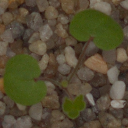

In [12]:
cv2_imshow(plant_images[7])

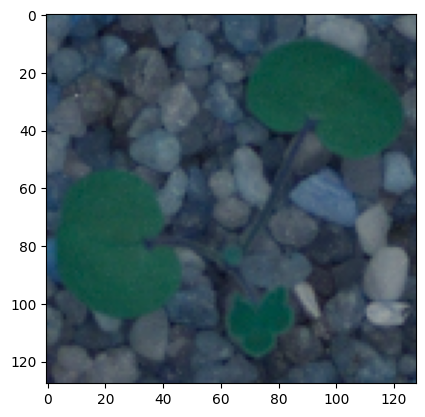

In [13]:
plt.imshow(plant_images[7])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

### Convert the BGR images to RGB images.

In [14]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(plant_images)):
  plant_images[i] = cv2.cvtColor(plant_images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [15]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(plant_images)):
  images_decreased.append( cv2.resize(plant_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

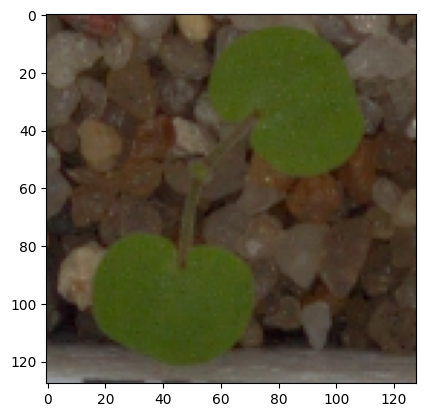

In [16]:
plt.imshow(plant_images[4])

**Image after resizing**

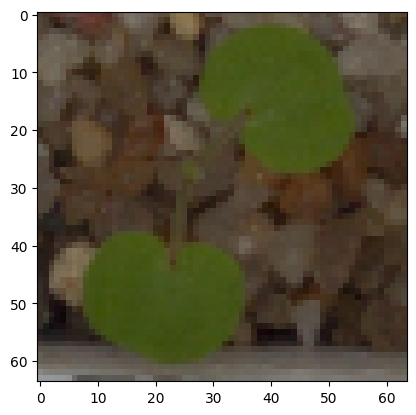

In [17]:
plt.imshow(images_decreased[4])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [18]:
# Splitting the data in an 90:10 ratio for temp and test sets
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),plant_labels , test_size=0.1, random_state=42,stratify=plant_labels)

# Splitting the data in an 90:10 ratio for train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [19]:
# Print the shape of Train, Validation and test data set along with percentage to dispay proportion distribution
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
print('\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in validation set:")
print(100*y_val.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3847, 64, 64, 3) (3847, 1)
Shape of validation set: (428, 64, 64, 3) (428, 1)
Shape of test set: (475, 64, 64, 3) (475, 1)


Percentage of classes in training set:
Label                    
Loose Silky-bent             13.776969
Common Chickweed             12.867169
Scentless Mayweed            10.865610
Small-flowered Cranesbill    10.449701
Fat Hen                       9.981804
Charlock                      8.214193
Sugar beet                    8.110216
Cleavers                      6.030673
Black-grass                   5.536782
Shepherds Purse               4.860931
Maize                         4.652976
Common wheat                  4.652976
Name: proportion, dtype: float64 

Percentage of classes in validation set:
Label                    
Loose Silky-bent             13.785047
Common Chickweed             12.850467
Scentless Mayweed            10.747664
Small-flowered Cranesbill    10.280374
Fat Hen                      10.046729
Sugar beet           

### Encode the target labels

In [20]:
# Convert labels from names to one hot vectors using Labelbinarizer.

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [21]:
# Print the shape of Train, Validation and test data set after encoded target variable
print("Shape of training set:", X_train.shape, y_train_encoded.shape)
print("Shape of validation set:", X_val.shape, y_val_encoded.shape)
print("Shape of test set:", X_test.shape, y_test_encoded.shape)

Shape of training set: (3847, 64, 64, 3) (3847, 12)
Shape of validation set: (428, 64, 64, 3) (428, 12)
Shape of test set: (475, 64, 64, 3) (475, 12)


### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [22]:
# Normalize the image pixels of train, test and validation data

X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [23]:
# Clearing backend
backend.clear_session()

In [24]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

- Let's start with a Conv Neural Network consisting of
  - Three Conv layers with 128, 64 and 32 filter respectively with
    - Kernal size 3x3
    - Passing = 'same'
    - Activation function of ReLU.
  - Three pooling layers with MaxPooling after each conv layer
  - One layer to flatten the output
  - One hidden layer with 16 neurons
  - Adam as the optimizer

In [25]:
# Intializing a sequential model
cnn_model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' with layers activation = relu, provides the output size same as the input size
# Input_shape denotes input image dimension of images
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same' with layers activation = relu
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of second conv layer
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same' with layers activation = relu
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of third conv layer
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model.add(Dense(12, activation='softmax'))

Let's print the summary of the model

In [26]:
# Generating the summary of the model
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

Let's compile the model

In [27]:
# use the Adam Optimizer
opt=Adam()

# Compile the model
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

<b> Fitting the model on the train data

In [28]:
# Defining the batch size and # epochs for this model
epochs = 30
batch_size = 32

# Fit the model on train data set and also using the validation data for validation
history_1 = cnn_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=epochs,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=batch_size,
            verbose=2
)

Epoch 1/30
121/121 - 11s - 94ms/step - accuracy: 0.1269 - loss: 2.4687 - val_accuracy: 0.1379 - val_loss: 2.4509
Epoch 2/30
121/121 - 1s - 10ms/step - accuracy: 0.1892 - loss: 2.3607 - val_accuracy: 0.2570 - val_loss: 2.1718
Epoch 3/30
121/121 - 1s - 9ms/step - accuracy: 0.2662 - loss: 2.1201 - val_accuracy: 0.3411 - val_loss: 1.9129
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.2904 - loss: 1.9482 - val_accuracy: 0.3855 - val_loss: 1.7757
Epoch 5/30
121/121 - 1s - 10ms/step - accuracy: 0.2870 - loss: 1.8977 - val_accuracy: 0.3785 - val_loss: 1.6926
Epoch 6/30
121/121 - 1s - 9ms/step - accuracy: 0.3067 - loss: 1.8429 - val_accuracy: 0.3995 - val_loss: 1.6398
Epoch 7/30
121/121 - 1s - 9ms/step - accuracy: 0.3213 - loss: 1.7884 - val_accuracy: 0.4252 - val_loss: 1.5002
Epoch 8/30
121/121 - 1s - 11ms/step - accuracy: 0.3369 - loss: 1.7790 - val_accuracy: 0.4369 - val_loss: 1.4960
Epoch 9/30
121/121 - 1s - 10ms/step - accuracy: 0.3416 - loss: 1.7488 - val_accuracy: 0.4533 - val_loss: 1

###**Model Evaluation**

In [29]:
accuracy_tain = cnn_model.evaluate(X_train_normalized,y_train_encoded,verbose=2);
accuracy_validation = cnn_model.evaluate(X_val_normalized,y_val_encoded,verbose=2);

121/121 - 1s - 8ms/step - accuracy: 0.6145 - loss: 1.1209
14/14 - 0s - 4ms/step - accuracy: 0.5607 - loss: 1.3003


In [30]:
print('Base CNN Model Train Accuracy:', accuracy_tain[1])
print('Base CNN Model Train Loss:', accuracy_tain[0])
print('Base CNN Model Validation Accuracy:', accuracy_validation[1])
print('Base CNN Model Validation Loss:', accuracy_validation[0])

Base CNN Model Train Accuracy: 0.6145048141479492
Base CNN Model Train Loss: 1.1208701133728027
Base CNN Model Validation Accuracy: 0.5607476830482483
Base CNN Model Validation Loss: 1.3002855777740479


- **Observations**
 - Train Accuracy ~.61% whereas Validation Accuracy ~0.56%
 - Train loss ~1.12% whereas Validation loss ~.1.30
 - Model is underfit and failed to predict plant categories classification.


####**Let's plot Accuracy vs No. of Epochs**

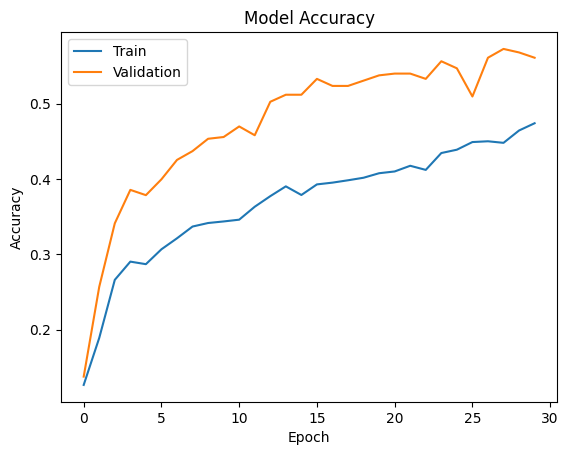

In [31]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The train and validation accuracy are starts increasing almost same pace but validation starts increasing more with some oscillations after approx 5th epoch.

####**Evaluate the model on test data**

In [32]:
accuracy = cnn_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print('Base CNN Model Test Accuracy:', accuracy[1])
print('Base CNN Model Test Loss:', accuracy[0])


15/15 - 1s - 54ms/step - accuracy: 0.5726 - loss: 1.2810
Base CNN Model Test Accuracy: 0.5726315975189209
Base CNN Model Test Loss: 1.2810053825378418


- **Observations**
 - Test Accuracy ~.57%
 - Test loss ~1.28%
 - Model is underfit and failed to predict test data set plant categories classification.

####**Plotting the Confusion Matrix**

In [33]:
# Get the output as probablities for each plant category
y_pred=cnn_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


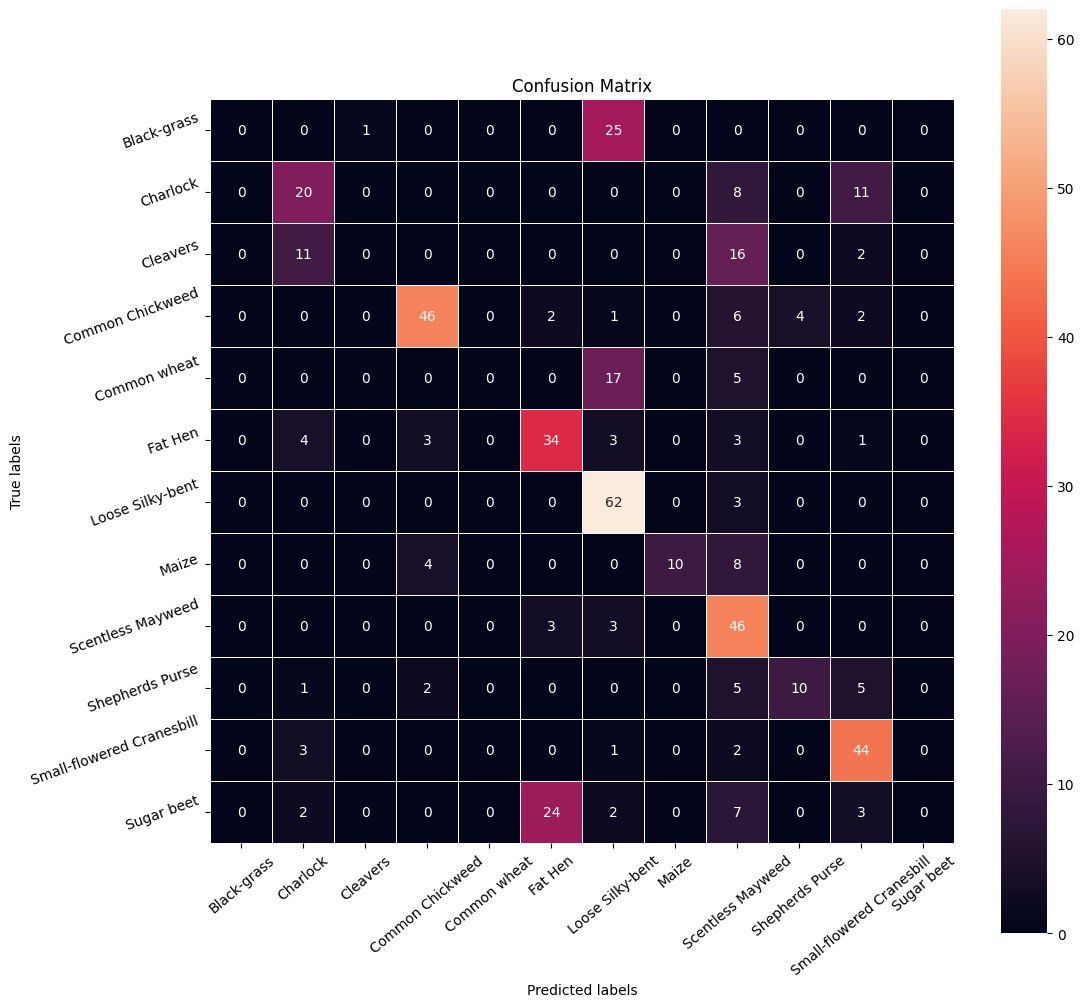

In [34]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix  = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

<b> Observations</b><br>

- We observe that some of the labels are not predicted correctly.
- In comparison to the rest, we can see that labels Loose Silky-bent, Common Chickweed, Small Flowered Cranesbill are well classified.
- We can also observe that labels Black grass, Cleavers, Common wheat and sugar beet are not classified at all.
- We can also observe that labels Charlock, scentless mayweed and Shepherds Purse are mostly misclassified.



####**Plotting Classification Report**

In [35]:
# Plotting the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.49      0.51      0.50        39
           2       0.00      0.00      0.00        29
           3       0.84      0.75      0.79        61
           4       0.00      0.00      0.00        22
           5       0.54      0.71      0.61        48
           6       0.54      0.95      0.69        65
           7       1.00      0.45      0.62        22
           8       0.42      0.88      0.57        52
           9       0.71      0.43      0.54        23
          10       0.65      0.88      0.75        50
          11       0.00      0.00      0.00        38

    accuracy                           0.57       475
   macro avg       0.43      0.47      0.42       475
weighted avg       0.47      0.57      0.50       475



<b> Observations</b><br>
  - As per above clasification report base CNN Model failed to predict for class 0, 2, 4 and 11 entirely.
  - However, has an average accracy for ~.57% for other 8 classes

## Model Performance Improvement

**Reducing the Learning Rate:**

Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [36]:
# Monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

In [37]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [38]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [39]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

- Let's start with a Conv Neural Network consisting of
  - Three Conv layers with 128, 64 and 32 filter respectively with
    - Kernal size 3x3
    - Passing = 'same'
    - Activation function of ReLU.
  - Three pooling layers with MaxPooling after each conv layer
  - Batch Normalization after each conv layer
  - One layer to flatten the output
  - Two hidden layer with 64 and 32 neurons respectively
  - Adam as the optimizer

In [40]:
# Intializing a sequential model
cnn_aug_model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' with layers activation = relu provides the output size same as the input size
# Input_shape denotes input image dimension of images
cnn_aug_model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
cnn_aug_model.add(MaxPooling2D((2, 2), padding = 'same'))
# Adding Batch Normalization
cnn_aug_model.add(BatchNormalization())

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same' with layers activation = relu
cnn_aug_model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of second conv layer
cnn_aug_model.add(MaxPooling2D((2, 2), padding = 'same'))
# Adding Batch Normalization
cnn_aug_model.add(BatchNormalization())

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same' with layers activation = relu
cnn_aug_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of third conv layer
cnn_aug_model.add(MaxPooling2D((2, 2), padding = 'same'))
# Adding Batch Normalization
cnn_aug_model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_aug_model.add(Flatten())

# Adding a fully connected dense layer with 64 neurons
cnn_aug_model.add(Dense(64, activation='relu'))
# Adding a dropout with 0.2 rate
cnn_aug_model.add(Dropout(0.2))

# Adding a fully connected dense layer with 16 neurons
cnn_aug_model.add(Dense(32, activation='relu'))
# Adding a dropout with 0.2 rate
cnn_aug_model.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_aug_model.add(Dense(12, activation='softmax'))

Let's print the summary of the model

In [41]:
# Generating the summary of the model
cnn_aug_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,348 (899.80 KB)

 Trainable params: 229,900 (898.05 KB)

 Non-trainable params: 448 (1.75 KB)

Let's compile the model

In [42]:
# use the Adam Optimizer
opt=Adam()

# Compile the model
cnn_aug_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

<b> Fitting the model on the train data

In [43]:
# Defining the batch size and # epochs for this model
epochs = 50
batch_size = 32

# Fit the model on train data set and also using the validation data for validation
history = cnn_aug_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.2046 - loss: 2.3469 - val_accuracy: 0.1379 - val_loss: 3.5645 - learning_rate: 0.0010
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.6612 - val_accuracy: 0.1379 - val_loss: 3.4542 - learning_rate: 0.0010
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.5013 - loss: 1.4899 - val_accuracy: 0.1379 - val_loss: 6.2571 - learning_rate: 0.0010
Epoch 4/50
  1/120 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5938 - loss: 1.2519
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.2519 - val_accuracy: 0.1379 - val_loss: 6.4536 - learning_rate: 0.0010
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.6063 - loss: 1.1776 - val_accuracy: 0.1379 - val_loss: 5.9475 - learning_rate: 5.0000e-04
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.7500 - l

####**Model Evaluation**

In [44]:
accuracy_tain = cnn_aug_model.evaluate(X_train_normalized,y_train_encoded,verbose=2);
accuracy_validation = cnn_aug_model.evaluate(X_val_normalized,y_val_encoded,verbose=2);

121/121 - 1s - 8ms/step - accuracy: 0.9405 - loss: 0.1662
14/14 - 0s - 4ms/step - accuracy: 0.8808 - loss: 0.4030


In [45]:
print('Augmented CNN Model Train Accuracy:', accuracy_tain[1])
print('Augmented CNN Model Train Loss:', accuracy_tain[0])
print('Augmented CNN Model Validation Accuracy:', accuracy_validation[1])
print('Augmented CNN Model Validation Loss:', accuracy_validation[0])

Augmented CNN Model Train Accuracy: 0.9404730796813965
Augmented CNN Model Train Loss: 0.16615796089172363
Augmented CNN Model Validation Accuracy: 0.8808411359786987
Augmented CNN Model Validation Loss: 0.4030224084854126


- **Observations**
 - Train Accuracy ~.94% whereas Validation Accuracy ~.88%
 - Train loss ~.16% whereas Validation loss ~.40
 - Model does seems generalize.

####**Let's plot Accuracy vs No. of Epochs**

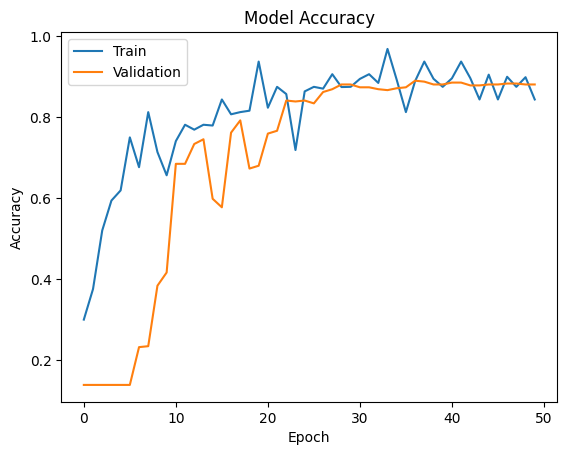

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The train and validation accuracy are increasing almost at same pace with some oscillations.
- After 20th epoch, validation accuracy increases steady without any oscillations.

####**Evaluate the model on test data**

In [47]:
accuracy = cnn_aug_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print('Augmented CNN Model Test Accuracy:', accuracy[1])
print('Augmented CNN Model Test Loss:', accuracy[0])

15/15 - 1s - 43ms/step - accuracy: 0.8821 - loss: 0.3819
Augmented CNN Model Test Accuracy: 0.88210529088974
Augmented CNN Model Test Loss: 0.38186678290367126


- **Observations**
 - Test Accuracy ~.88%
 - Test loss ~.38%
 - Augmented Model seems to predict all plant categories well for test data set.

####**Plotting the Confusion Matrix**

In [48]:
# Complete the code to obtain the output probabilities
y_pred=cnn_aug_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


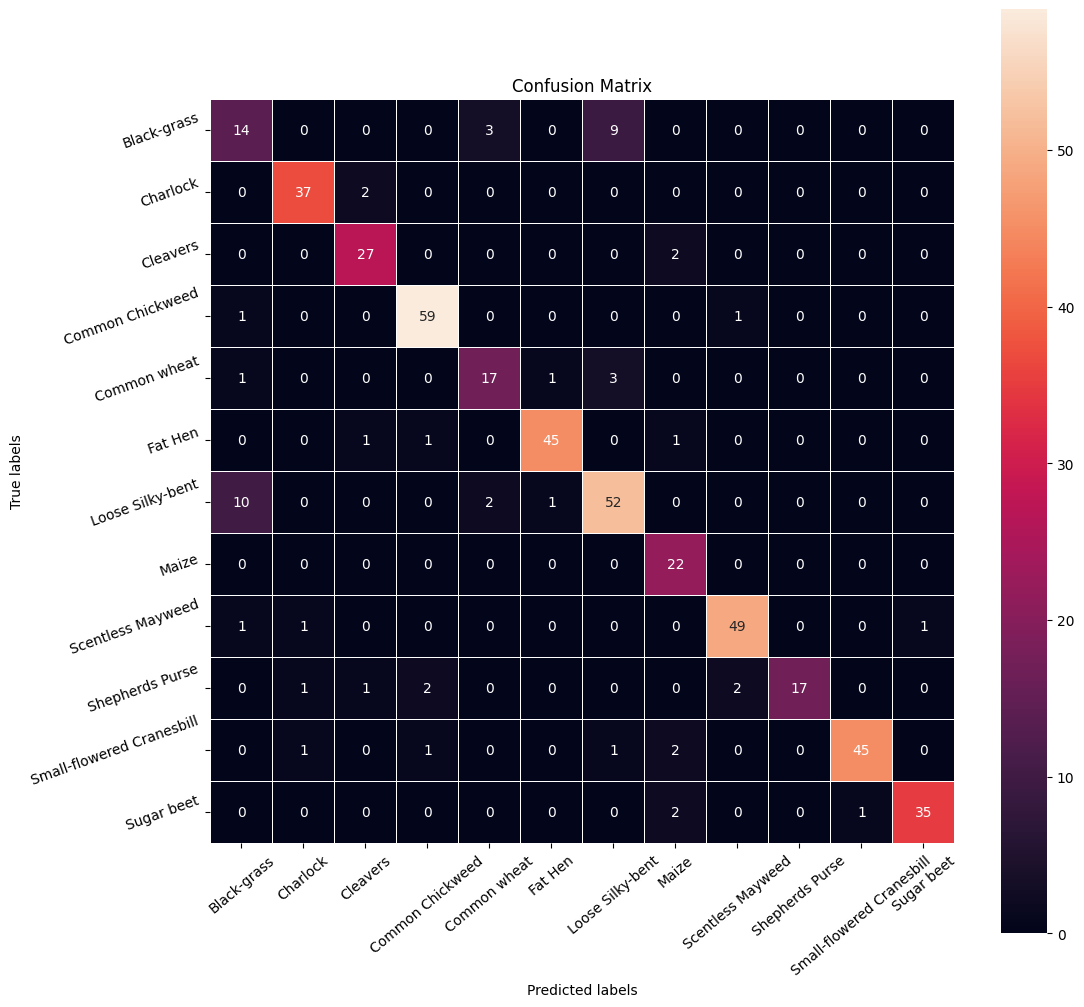

In [49]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

<b> Observations</b><br>
- We observe that most of the labels are predicted correctly.
- In comparison to the rest, we can see that labels Charlock, Common Chickweed, Fat Hen, Small Flowered Cranesbill and sugar beet are well classified.
- We can also observe that labels Black grass, Cleavers, Common wheat and sugar beet are well classified which were failed to predcit entirely by base CNN model.
- We can also observe that other labels are mostly misclassified.



####**Plotting Classification Report**

In [50]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        26
           1       0.93      0.95      0.94        39
           2       0.87      0.93      0.90        29
           3       0.94      0.97      0.95        61
           4       0.77      0.77      0.77        22
           5       0.96      0.94      0.95        48
           6       0.80      0.80      0.80        65
           7       0.76      1.00      0.86        22
           8       0.94      0.94      0.94        52
           9       1.00      0.74      0.85        23
          10       0.98      0.90      0.94        50
          11       0.97      0.92      0.95        38

    accuracy                           0.88       475
   macro avg       0.87      0.87      0.86       475
weighted avg       0.89      0.88      0.88       475



<b> Observations</b><br>
  - As per above clasification report Augmented Model succes to predict for class 0, 2, 4 and 11 as well approx ~.53%, ~.90, ~.77 and ~.95% respectively.
  - Moreover, has an average accuracy for ~.88%

## Final Model

- **Observations**
  - As we have seen, second CNN model i.e cnn_aug_model was able to predict the test image correctly with a test accuracy of ~88%.

  - We can observe from the confusion matrix that our second model with Data Augmentatoin was the best model because it predicted the majority of the classes better than the base model.

  - Data Augmentation has also helped in improving the performance of the model.


### Visualizing the prediction

Plotting different images from test data and see if the model is predicting the image correctly.

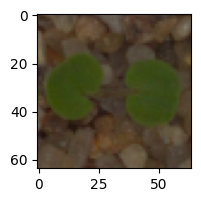

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


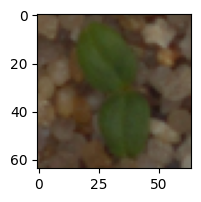

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Cleavers']
True Label Cleavers


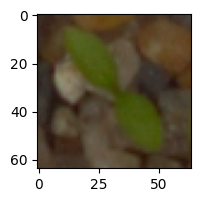

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


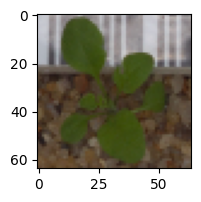

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [51]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(cnn_aug_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(cnn_aug_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(cnn_aug_model.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(cnn_aug_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

Out Final model is predicting the image correctly.

## Actionable Insights and Business Recommendations

1. As we have seen, the CNN model with Data Augmentation was able to predict the plant seedlings images with their respective categories correctly with a test accuracy of 88%.

2. **There might still be scope for improvement in the accuracy of the CNN model** chosen here. We can try adding a more dense layer and see if you can get more accuracy than the best model.

3. Once the desired performance is achieved from the model, the company can use it to classify plant seedlings images being uploaded to the website.

_____